### aim: 

### date: 

In [1]:
import xarray as xr

In [78]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [79]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [81]:

scendict = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'color2':'orange'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'color2':'orangered'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'color2':'mediumseagreen'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'color2':'green'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'color2':'dodgerblue'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'color2':'mediumblue'}
}


In [82]:
mld_ukesm_1A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_1A.nc')
mld_ukesm_1B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_1B.nc')
mld_ukesm_2A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_2A.nc')
mld_ukesm_2B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_2B.nc')
mld_ukesm_3A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_3A.nc')
mld_ukesm_3B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_3B.nc')

mld_tom_1A = xr.open_dataset(f'./extracted-summary/somxl010_tom_1AA7.nc')
mld_tom_1B = xr.open_dataset(f'./extracted-summary/somxl010_tom_1BA7.nc')
mld_tom_2A = xr.open_dataset(f'./extracted-summary/somxl010_tom_2AA7.nc')
mld_tom_2B = xr.open_dataset(f'./extracted-summary/somxl010_tom_2BA7.nc')
mld_tom_3A = xr.open_dataset(f'./extracted-summary/somxl010_tom_3AA7.nc')
mld_tom_3B = xr.open_dataset(f'./extracted-summary/somxl010_tom_3BA7.nc')

sst_ukesm_1A = xr.open_dataset(f'./extracted-summary/SST_ukesm_1A.nc')
sst_ukesm_1B = xr.open_dataset(f'./extracted-summary/SST_ukesm_1B.nc')
sst_ukesm_2A = xr.open_dataset(f'./extracted-summary/SST_ukesm_2A.nc')
sst_ukesm_2B = xr.open_dataset(f'./extracted-summary/SST_ukesm_2B.nc')
sst_ukesm_3A = xr.open_dataset(f'./extracted-summary/SST_ukesm_3A.nc')
sst_ukesm_3B = xr.open_dataset(f'./extracted-summary/SST_ukesm_3B.nc')

sst_tom_1A = xr.open_dataset(f'./extracted-summary/SST_tom_1AA7.nc')
sst_tom_1B = xr.open_dataset(f'./extracted-summary/SST_tom_1BA7.nc')
sst_tom_2A = xr.open_dataset(f'./extracted-summary/SST_tom_2AA7.nc')
sst_tom_2B = xr.open_dataset(f'./extracted-summary/SST_tom_2BA7.nc')
sst_tom_3A = xr.open_dataset(f'./extracted-summary/SST_tom_3AA7.nc')
sst_tom_3B = xr.open_dataset(f'./extracted-summary/SST_tom_3BA7.nc')

## making bar graphs - MLD

In [83]:
def get_effect_ozone(sc1,sc2,dec1=1950, dec2=2090,var = 'wspd10m', seas = 'FY'):

    ##for warming just have 
    sc = sc1 - sc2
    
    if seas == 'FY':
        
        start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01')).\
        groupby('time_counter.year').mean().mean().values
        end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01')).\
        groupby('time_counter.year').mean().mean().values
        
    else:
        
        start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01'))
        start = start.sel(time_counter=(start['time_counter.season'] == seas)).\
        groupby('time_counter.year').mean().mean().values
        
        end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01'))
        end = end.sel(time_counter=(end['time_counter.season'] == seas)).\
        groupby('time_counter.year').mean().mean().values
    
    effect1 = end-start # the better one i think 
    effect2 = end
    
    return effect1, effect2

def get_effect_warming(sc1,dec1=1950, dec2=2090,var = 'wspd10m', seas = 'FY'):

    ##for warming just have 
    sc = sc1
    
    if seas == 'FY':
        
        start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01')).\
        groupby('time_counter.year').mean().mean().values
        end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01')).\
        groupby('time_counter.year').mean().mean().values

    else:
        
        start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01'))
        start = start.sel(time_counter=(start['time_counter.season'] == seas)).\
        groupby('time_counter.year').mean().mean().values
        
        end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01'))
        end = end.sel(time_counter=(end['time_counter.season'] == seas)).\
        groupby('time_counter.year').mean().mean().values
    
    effect1 = end-start # the better one i think 
    effect2 = end
    
    return effect1, effect2

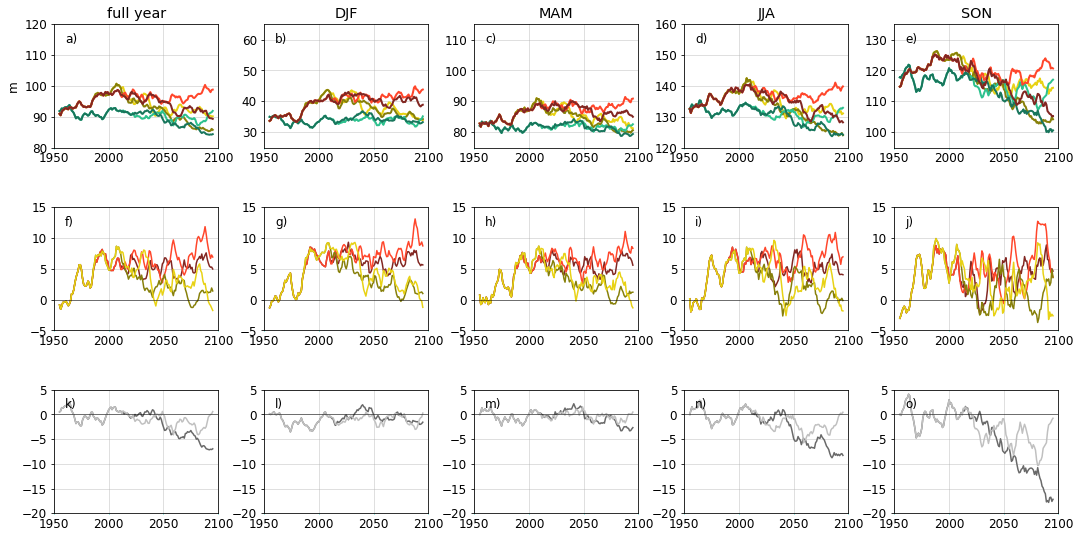

In [86]:
fact = 1
tlw = 1.5
tw = 0.3
fig, axs = plt.subplots(3,5, figsize=(18*fact, 9*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
var = 'somxl010'; vardesc = 'MLD'; ylab = 'm'

 #####
wspdset = [mld_ukesm_1A, mld_ukesm_1B, mld_ukesm_2A, mld_ukesm_2B, mld_ukesm_3A, mld_ukesm_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

mld_ukesm_2A_50 = mld_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
mld_ukesm_2B_50 = mld_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

wspdset_o3 = [(mld_ukesm_3B-mld_ukesm_2B), (mld_ukesm_3A-mld_ukesm_2A), \
              (mld_ukesm_1B-mld_ukesm_2B), (mld_ukesm_1A-mld_ukesm_2A)]
scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']

#wspdset_t = [(wspd_2B-wspd_2B_50), (wspd_2A-wspd_2A_50)]
cols_t = ['dimgrey', 'silver']
scens_t = ['high temp.','low temp.']

for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name2'])
      
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name2'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[4], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1)
    
#axs[3].legend(loc = (0.06, 0.5), ncol = 2, fontsize = 10)

##### ozone effect
ind = 5
for x in range(0,4):
    tsc = scens_o3[x]
    wspd = wspdset_o3[x]
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_o3[x])    
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_o3[x])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_o3[x])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1)
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[4+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1)
    
#### temperature effect
ind = 10
tv = mld_ukesm_2B[var].groupby('time_counter.year').mean()-\
mld_ukesm_2B_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[0+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])

tv = mld_ukesm_2B[var].sel(time_counter=(mld_ukesm_2B['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
mld_ukesm_2B_50[var].sel(time_counter=(mld_ukesm_2B_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[1+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])

tv = mld_ukesm_2B[var].sel(time_counter=(mld_ukesm_2B['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
mld_ukesm_2B_50[var].sel(time_counter=(mld_ukesm_2B_50['time_counter.season'] == 'MAM')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])
    
tv = mld_ukesm_2B[var].sel(time_counter=(mld_ukesm_2B['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
mld_ukesm_2B_50[var].sel(time_counter=(mld_ukesm_2B_50['time_counter.season'] == 'JJA')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[3+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])

tv = mld_ukesm_2B[var].sel(time_counter=(mld_ukesm_2B['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
mld_ukesm_2B_50[var].sel(time_counter=(mld_ukesm_2B_50['time_counter.season'] == 'SON')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[4+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])    
    
tv = mld_ukesm_2A[var].groupby('time_counter.year').mean()-\
mld_ukesm_2A_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[0+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])

tv = mld_ukesm_2A[var].sel(time_counter=(mld_ukesm_2A['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
mld_ukesm_2A_50[var].sel(time_counter=(mld_ukesm_2A_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[1+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])

tv = mld_ukesm_2A[var].sel(time_counter=(mld_ukesm_2A['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
mld_ukesm_2A_50[var].sel(time_counter=(mld_ukesm_2A_50['time_counter.season'] == 'MAM')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])
    
tv = mld_ukesm_2A[var].sel(time_counter=(mld_ukesm_2A['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
mld_ukesm_2A_50[var].sel(time_counter=(mld_ukesm_2A_50['time_counter.season'] == 'JJA')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[3+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])

tv = mld_ukesm_2A[var].sel(time_counter=(mld_ukesm_2A['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
mld_ukesm_2A_50[var].sel(time_counter=(mld_ukesm_2A_50['time_counter.season'] == 'SON')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[4+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])  
##low T


#### bar graph
def plot_effects(ind,tseas, tw = 0.8, xticklab = False):
    biggap = 0.8
    smolgap = 0.3
    tplacar = []
    
    tplac = 1
    e_wl, e2 = get_effect_warming(mld_ukesm_2A, seas = tseas, var = 'somxl010')
    axs[ind].bar(tplac,e_wl, color = 'lightgrey',width=tw, )
    tplacar.append(tplac)
    
    tplac = tplac+tw+smolgap
    e_wh, e2 = get_effect_warming(mld_ukesm_2B, seas = tseas, var = 'somxl010')
    axs[ind].bar(tplac,e_wh, color = 'dimgrey',width=tw,)
    tplacar.append(tplac)
    
    tplac = tplac+tw+biggap
    e, e2 = get_effect_ozone(mld_ukesm_1A, mld_ukesm_2A, seas = tseas, var = 'somxl010')
    axs[ind].bar(tplac,e2, color = scendict['1A']['color'],width=tw,)
    tplacar.append(tplac)
    
    tplac = tplac+tw+smolgap
    e, e2 = get_effect_ozone(mld_ukesm_1B, mld_ukesm_2B, seas = tseas, var = 'somxl010')
    axs[ind].bar(tplac,e2, color = scendict['1B']['color'],width=tw,)
    tplacar.append(tplac)
    
    tplac = tplac+tw+biggap
    e, e2 = get_effect_ozone(mld_ukesm_3A, mld_ukesm_2A, seas = tseas, var = 'somxl010')
    axs[ind].bar(tplac,e2, color = scendict['3A']['color'],width=tw,)
    tplacar.append(tplac)
    
    tplac = tplac+tw+smolgap
    e, e2 = get_effect_ozone(mld_ukesm_3B, mld_ukesm_2B, seas = tseas, var = 'somxl010')
    axs[ind].bar(tplac,e2, color = scendict['3B']['color'],width=tw,)
    tplacar.append(tplac)
    
    axs[ind].set_xlim([1-0.5*tw-biggap,tplac+0.5*tw+biggap])

    axs[ind].set_xticks(tplacar)
    axs[ind].set_xticklabels(['','','','','','',], rotation = 60)
    
    if xticklab:     
        axs[ind].set_xticklabels(['GHG (SSP1)', 'GHG (SSP3)', 'OR (SSP 1)',\
                         'OR (SSP 3)','OD (SSP 1)','OD (SSP 3)'], rotation = 80)



##################
### titles, etc
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
t1 = 'mixed layer depth, 1950-2100'
# t2 = 'effect of ozone concentration changes on mixed layer depth, 1950-2100'
# t3 = 'effect of GHG emissions on mixed layer depth, 1950-2100'
# t4 = 'effect of ozone concentration changes and GHG emissions on mixed layer depth, $\overline{2090-2100} - \overline{1950-1960}$'
fs = 16

#plt.figtext(0.5,0.92, t1, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.71, t2, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.5, t3, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")

# #####
for ind in range(0,15):
    axs[ind].axhline(y=0, color = 'k', linewidth = 0.5)
    
# for ind in range(15,20):
#     axs[ind].axhline(y=0, color = 'k', linewidth = 0.5)
#     axs[ind].set_ylim(-0.2,0.82)
# axs[0].set_ylabel('m')

for i in range(0,15):
    axs[i].tick_params(axis="x", direction="out", length=1, width=1, color="turquoise")
    axs[i].grid(alpha = 0.5)
    
for i in range(0,15):
    axs[i].set_xlim([1950,2100])
    axs[i].set_xlabel('')
    
lab = ['a)','b)','c)','d)','e)',] 
ymi = np.array([80,25,75,120,95])  
hi = 40
for i in range(0,5):
    axs[i].set_ylim([ymi[i],ymi[i]+hi])
    axs[i].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['f)','g)','h)','i)','j)']  
ymi = -5; hi=20
for i in range(0,5):
    axs[i+5].set_ylim([ymi,ymi+hi])
    axs[i+5].text(1960,ymi+0.85*hi,lab[i])
    
lab = ['k)','l)','m)','n)','o)']  
ymi = -20; hi=25
for i in range(0,5):
    axs[i+10].set_ylim([ymi,ymi+hi])
    axs[i+10].text(1960,ymi+0.85*hi,lab[i])
    
# lab = ['p)','q)','r)','s)','t)']  
# ymi = np.array([-20,-20,-20,-20,-20,])
# hi = 30
# for i in range(0,5):
#     axs[i+15].set_ylim([ymi[i],ymi[i]+hi])
#     #axs[i+15].set_xlim([0.7,6.7])
#     axs[i+15].text(1,ymi[i]+0.85*hi,lab[i])

tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])    

#plt.tight_layout()
tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])
    
for i in range(1,15):
    axs[i].set_ylabel('')

axs[0].set_ylabel('m')
    
# axs[7].legend(fontsize = 8)
# axs[12].legend()
#plt.tight_layout()
#fig.savefig('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-MLDline.jpg')
fname = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-MLDforpres3.jpg'
fig.savefig(fname, transparent=None, dpi=250, format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None,
       )
   

### sst

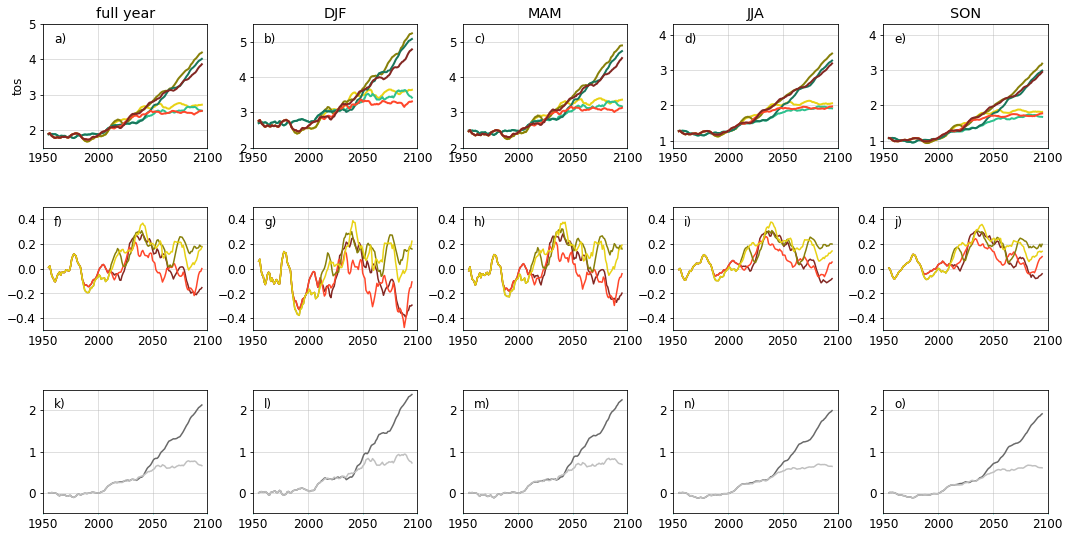

In [89]:
var = 'tos'; vardesc = 'sst'; ylab = 'deg C'

fact = 1
fig, axs = plt.subplots(3,5, figsize=(18*fact, 9*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
var = 'tos'; vardesc = 'sst'; ylab = 'deg C'
# #####
wspdset = [sst_ukesm_1A, sst_ukesm_1B, sst_ukesm_2A, sst_ukesm_2B, sst_ukesm_3A, sst_ukesm_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

sst_ukesm_2A_50 = sst_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
sst_ukesm_2B_50 = sst_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

wspdset_o3 = [(sst_ukesm_3B-sst_ukesm_2B), (sst_ukesm_3A-sst_ukesm_2A), \
              (sst_ukesm_1B-sst_ukesm_2B), (sst_ukesm_1A-sst_ukesm_2A)]
scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']

cols_t = ['dimgrey', 'silver']
scens_t = ['high temp.','low temp.']

for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name2'])
      
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name2'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[4], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1)
    
#axs[3].legend(loc = (0.06, 0.5), ncol = 2, fontsize = 10)

# ##### ozone effect
ind = 5
for x in range(0,4):
    tsc = scens_o3[x]
    wspd = wspdset_o3[x]
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_o3[x])    
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_o3[x])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_o3[x])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1)
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[4+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1)
    
#### temperature effect
ind = 10
tv = sst_ukesm_2B[var].groupby('time_counter.year').mean()-\
sst_ukesm_2B_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[0+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])

tv = sst_ukesm_2B[var].sel(time_counter=(sst_ukesm_2B['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
sst_ukesm_2B_50[var].sel(time_counter=(sst_ukesm_2B_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[1+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])

tv = sst_ukesm_2B[var].sel(time_counter=(sst_ukesm_2B['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
sst_ukesm_2B_50[var].sel(time_counter=(sst_ukesm_2B_50['time_counter.season'] == 'MAM')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])
    
tv = sst_ukesm_2B[var].sel(time_counter=(sst_ukesm_2B['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
sst_ukesm_2B_50[var].sel(time_counter=(sst_ukesm_2B_50['time_counter.season'] == 'JJA')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[3+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])

tv = sst_ukesm_2B[var].sel(time_counter=(sst_ukesm_2B['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
sst_ukesm_2B_50[var].sel(time_counter=(sst_ukesm_2B_50['time_counter.season'] == 'SON')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[4+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])    
    
tv = sst_ukesm_2A[var].groupby('time_counter.year').mean()-\
sst_ukesm_2A_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[0+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])

tv = sst_ukesm_2A[var].sel(time_counter=(sst_ukesm_2A['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
sst_ukesm_2A_50[var].sel(time_counter=(sst_ukesm_2A_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[1+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])

tv = sst_ukesm_2A[var].sel(time_counter=(sst_ukesm_2A['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
sst_ukesm_2A_50[var].sel(time_counter=(sst_ukesm_2A_50['time_counter.season'] == 'MAM')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])
    
tv = sst_ukesm_2A[var].sel(time_counter=(sst_ukesm_2A['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
sst_ukesm_2A_50[var].sel(time_counter=(sst_ukesm_2A_50['time_counter.season'] == 'JJA')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[3+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])

tv = sst_ukesm_2A[var].sel(time_counter=(sst_ukesm_2A['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
sst_ukesm_2A_50[var].sel(time_counter=(sst_ukesm_2A_50['time_counter.season'] == 'SON')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[4+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])  
##low T



###
##################
### titles, etc
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
t1 = 'sea surface temperature, 1950-2100'
t2 = 'effect of ozone concentration changes on sea surface temperature, 1950-2100'
t3 = 'effect of GHG emissions on sea surface temperature, 1950-2100'
t4 = 'effect of ozone concentration changes and GHG emissions on sea surface temperature, $\overline{2090-2100} - \overline{1950-1960}$'
fs = 16

# plt.figtext(0.5,0.92, t1, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.71, t2, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.5, t3, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")

# #####
for ind in range(1,15):
    axs[ind].set_ylabel('')
    
# for ind in range(15,20):
#     axs[ind].axhline(y=0, color = 'k', linewidth = 0.5)
#     axs[ind].set_ylim(-0.2,0.82)
# axs[0].set_ylabel('$^{\circ}$ C')

for i in range(0,15):
    axs[i].tick_params(axis="x", direction="out", length=1, width=1, color="turquoise")
    axs[i].grid(alpha = 0.5)
    
for i in range(0,15):
    axs[i].set_xlim([1950,2100])
    axs[i].set_xlabel('')
    
lab = ['a)','b)','c)','d)','e)',] 
ymi = np.array([1.5,2,2,0.8,0.8])  
hi = 3.5
for i in range(0,5):
    axs[i].set_ylim([ymi[i],ymi[i]+hi])
    axs[i].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['f)','g)','h)','i)','j)']  
ymi = -0.5; hi=1
for i in range(0,5):
    axs[i+5].set_ylim([ymi,ymi+hi])
    axs[i+5].text(1960,ymi+0.85*hi,lab[i])
    
lab = ['k)','l)','m)','n)','o)']  
ymi = -0.5; hi=3
for i in range(0,5):
    axs[i+10].set_ylim([ymi,ymi+hi])
    axs[i+10].text(1960,ymi+0.85*hi,lab[i])
    
# lab = ['p)','q)','r)','s)','t)']  
# ymi = -0.5
# hi = 3
# for i in range(0,5):
#     axs[i+15].set_ylim([ymi,ymi+hi])
#     axs[i+15].text(1,ymi+0.85*hi,lab[i])
    
tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])
    
# axs[7].legend(fontsize = 8)
# axs[12].legend()
#plt.tight_layout()
#fig.savefig('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-SSTline.jpg')
fname = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-SSTforpres3.jpg'
fig.savefig(fname, transparent=None, dpi=250, format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None,
       )

## OT

In [90]:
def make_yearlist_tom(yrst, yrend, tscen, \
                  tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/max_OT/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'{tdir}/seas_OT_{yr}_{tscen}-TOMA7.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

ot_tom_1A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'1A'))
ot_tom_2A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'2A'))
ot_tom_3A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'3A'))
ot_tom_1B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'1B'))
ot_tom_2B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'2B'))
ot_tom_3B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'3B'))

def make_yearlist(yrst, yrend, tscen, \
                  tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/max_OT/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'{tdir}/seas_OT_{yr}_{tscen}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

ot_ukesm_1A = xr.open_mfdataset(make_yearlist(1950,2099,'1A'))
ot_ukesm_2A = xr.open_mfdataset(make_yearlist(1950,2099,'2A'))
ot_ukesm_3A = xr.open_mfdataset(make_yearlist(1950,2099,'3A'))
ot_ukesm_1B = xr.open_mfdataset(make_yearlist(1950,2099,'1B'))
ot_ukesm_2B = xr.open_mfdataset(make_yearlist(1950,2099,'2B'))
ot_ukesm_3B = xr.open_mfdataset(make_yearlist(1950,2099,'3B'))

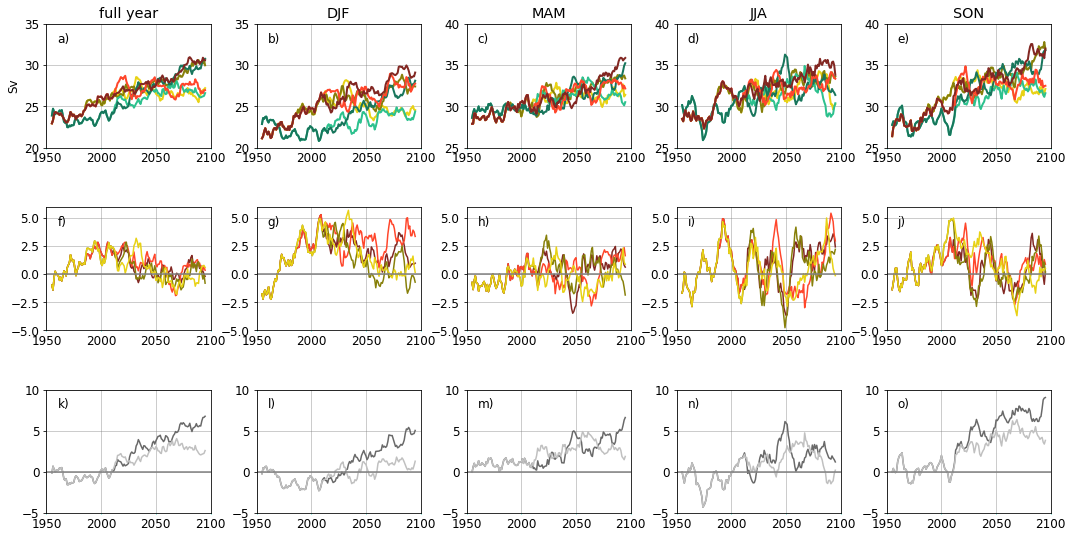

In [93]:
fact = 1
var = 'max_OT'; vardesc = 'overturning'; ylab = 'Sv'
var1 = 'max_OT_yr'

fig, axs = plt.subplots(3,5, figsize=(18*fact, 9*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

###
tlw = 1.5
tlw2 = 0.3 #linewidth
fact = 1.2
ypos = 1.02
fs2 = 10
var = 'max_OT'; vardesc = 'overturning'; ylab = 'Sv'
var1 = 'max_OT_yr'

# #####
wspdset = [ot_ukesm_1A, ot_ukesm_1B, ot_ukesm_2A, ot_ukesm_2B, ot_ukesm_3A, ot_ukesm_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

ot_ukesm_2A_50 = ot_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
ot_ukesm_2B_50 = ot_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

wspdset_o3 = [(ot_ukesm_3B-ot_ukesm_2B), (ot_ukesm_3A-ot_ukesm_2A), \
              (ot_ukesm_1B-ot_ukesm_2B), (ot_ukesm_1A-ot_ukesm_2A)]
scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']

#wspdset_t = [(wspd_2B-wspd_2B_50), (wspd_2A-wspd_2A_50)]
cols_t = ['dimgrey', 'silver']
scens_t = ['high temp.','low temp.']

for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    
    tv = wspd[var1].groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name2'])
      
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name2'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[4], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1)
    
#axs[3].legend(loc = (0.06, 0.5), ncol = 2, fontsize = 10)

##### ozone effect
ind = 5
for x in range(0,4):
    tsc = scens_o3[x]
    wspd = wspdset_o3[x]
    tv = wspd[var1].groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_o3[x])    
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_o3[x])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_o3[x])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1)
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[4+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1)
    
#### temperature effect
ind = 10
tv = ot_ukesm_2B[var1].groupby('time_counter.year').mean()-\
ot_ukesm_2B_50[var1].mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[0+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])

tv = ot_ukesm_2B[var].sel(time_counter=(ot_ukesm_2B['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
ot_ukesm_2B_50[var].sel(time_counter=(ot_ukesm_2B_50['time_counter.season'] == 'DJF')).mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[1+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])

tv = ot_ukesm_2B[var].sel(time_counter=(ot_ukesm_2B['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
ot_ukesm_2B_50[var].sel(time_counter=(ot_ukesm_2B_50['time_counter.season'] == 'MAM')).mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])
    
tv = ot_ukesm_2B[var].sel(time_counter=(ot_ukesm_2B['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
ot_ukesm_2B_50[var].sel(time_counter=(ot_ukesm_2B_50['time_counter.season'] == 'JJA')).mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[3+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])

tv = ot_ukesm_2B[var].sel(time_counter=(ot_ukesm_2B['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
ot_ukesm_2B_50[var].sel(time_counter=(ot_ukesm_2B_50['time_counter.season'] == 'SON')).mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[4+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])    
    
tv = ot_ukesm_2A[var1].groupby('time_counter.year').mean()-\
ot_ukesm_2A_50[var1].mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[0+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])

tv = ot_ukesm_2A[var].sel(time_counter=(ot_ukesm_2A['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
ot_ukesm_2A_50[var].sel(time_counter=(ot_ukesm_2A_50['time_counter.season'] == 'DJF')).mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[1+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])

tv = ot_ukesm_2A[var].sel(time_counter=(ot_ukesm_2A['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
ot_ukesm_2A_50[var].sel(time_counter=(ot_ukesm_2A_50['time_counter.season'] == 'MAM')).mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])
    
tv = ot_ukesm_2A[var].sel(time_counter=(ot_ukesm_2A['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
ot_ukesm_2A_50[var].sel(time_counter=(ot_ukesm_2A_50['time_counter.season'] == 'JJA')).mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[3+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])

tv = ot_ukesm_2A[var].sel(time_counter=(ot_ukesm_2A['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
ot_ukesm_2A_50[var].sel(time_counter=(ot_ukesm_2A_50['time_counter.season'] == 'SON')).mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[4+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])  


for i in range(0,15):
    axs[i].grid(color = 'grey', linestyle = '-', alpha = 0.5)
    
### effect
ymi = [20,20,25,25,25]
tits0 = [f'a) FY, {vardesc}',f'b) DJF, {vardesc}',f'c) MAM, {vardesc}',\
        f'd) JJA, {vardesc}',f'e) SON, {vardesc}']
for i in range(0,5):
    #axs[i].set_title(tits0[i], y = ypos)
    axs[i].set_xlim([1950,2100])
    #axs[2].legend(loc = 'upper left', ncol = 2, fontsize = fs2)
    #axs[3].legend(loc = (0.06, 0.5), ncol = 2, fontsize = 10)
    #axs[3].legend(bbox_to_anchor = (1,1), ncol = 2, fontsize = 10)
    axs[i].set_ylim([ymi[i], ymi[i]+15])
    axs[i].set_xlabel('')
    
tits = ['f) FY, ozone effect', 'g) DJF, ozone effect','h) MAM, ozone effect',\
        'i) JJA, ozone effect','j) SON, ozone effect']
ind = 5; ymi = -5; yma = 7
for i in range(0+ind,5+ind):
    #axs[i].set_title(tits[i-ind], y = ypos)
    axs[i].set_xlim([1950,2100])
    #axs[2+ind].legend(loc = 'upper right', ncol = 2, fontsize = fs2-2)
    axs[i].set_ylim([ymi,yma])
    axs[i].axhline(y=0, color = 'grey', linestyle = '-')
    axs[i].set_xlabel('')
    
ind = 10; ymi = -3; yma = 10
tits1 = ['k) FY, temp. effect', 'l) DJF, temp. effect','m) MAM, temp. effect',\
        'n) JJA, temp. effect','o) SON, temp. effect']
for i in range(0+ind,5+ind):
    
    #axs[i].set_title(tits1[i-ind], y = ypos)
    axs[i].set_xlim([1950,2100])
    #axs[1+ind].legend(loc = 'upper left', fontsize = fs2)
    axs[i].set_ylim([ymi,yma])
    axs[i].axhline(y=0, color = 'grey', linestyle = '-')
    
axs[0].set_ylabel(f'{ylab}')
axs[5].set_ylabel(f'{ylab}')
axs[10].set_ylabel(f'{ylab}')
    
    


####

def plot_effects(ind,tseas, tvar, tw = 0.8, xticklab = False):
    biggap = 0.8
    smolgap = 0.3
    tplacar = []
    
    tplac = 1
    e_wl, e2 = get_effect_warming(ot_ukesm_2A, seas= tseas, var = tvar )
    axs[ind].bar(tplac,e_wl, color = 'lightgrey',width=tw, )
    tplacar.append(tplac)
    
    tplac = tplac+tw+smolgap
    e_wh, e2 = get_effect_warming(ot_ukesm_2B, seas= tseas, var = tvar )
    axs[ind].bar(tplac,e_wh, color = 'dimgrey',width=tw,)
    tplacar.append(tplac)
    
    tplac = tplac+tw+biggap
    e, e2 = get_effect_ozone(ot_ukesm_1A, ot_ukesm_2A, seas= tseas, var = tvar )
    axs[ind].bar(tplac,e2, color = scendict['1A']['color'],width=tw,)
    tplacar.append(tplac)
    
    tplac = tplac+tw+smolgap
    e, e2 = get_effect_ozone(ot_ukesm_1B, ot_ukesm_2B, seas= tseas, var = tvar )
    axs[ind].bar(tplac,e2, color = scendict['1B']['color'],width=tw,)
    tplacar.append(tplac)
    
    tplac = tplac+tw+biggap
    e, e2 = get_effect_ozone(ot_ukesm_3A, ot_ukesm_2A, seas= tseas, var = tvar )
    axs[ind].bar(tplac,e2, color = scendict['3A']['color'],width=tw,)
    tplacar.append(tplac)
    
    tplac = tplac+tw+smolgap
    e, e2 = get_effect_ozone(ot_ukesm_3B, ot_ukesm_2B, seas= tseas, var = tvar )
    axs[ind].bar(tplac,e2, color = scendict['3B']['color'],width=tw,)
    tplacar.append(tplac)
    
    axs[ind].set_xlim([1-0.5*tw-biggap,tplac+0.5*tw+biggap])

    axs[ind].set_xticks(tplacar)
    axs[ind].set_xticklabels(['','','','','','',], rotation = 60)
    
    if xticklab:     
        axs[ind].set_xticklabels(['GHG (SSP1)', 'GHG (SSP3)', 'OR (SSP 1)',\
                         'OR (SSP 3)','OD (SSP 1)','OD (SSP 3)'], rotation = 80)

    
# ind = 15; tseas = 'FY'; var = 'max_OT_yr'
# plot_effects(ind,tseas,'max_OT_yr', xticklab = True)
# ind = 16; tseas = 'DJF'
# plot_effects(ind,tseas,'max_OT')
# ind = 17; tseas = 'MAM'
# plot_effects(ind,tseas,'max_OT')
# ind = 18; tseas = 'JJA'
# plot_effects(ind,tseas,'max_OT')
# ind = 19; tseas = 'SON'
# plot_effects(ind,tseas,'max_OT')


###
##################
### titles, etc
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
t1 = 'maximum Southern Ocean meridional overturning circulation (MOC) , 1950-2100'
t2 = 'effect of ozone concentration changes on maximum Southern Ocean MOC, 1950-2100'
t3 = 'effect of GHG emissions on maximum Southern Ocean MOC, 1950-2100'
t4 = 'effect of ozone concentration changes and GHG emissions on maximum Southern Ocean MOC, $\overline{2090-2100} - \overline{1950-1960}$'
fs = 16

# plt.figtext(0.5,0.92, t1, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.71, t2, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.5, t3, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")

# #####
for ind in range(1,15):
    axs[ind].set_ylabel('')

# for ind in range(15,20):
#     axs[ind].axhline(y=0, color = 'k', linewidth = 0.5)
#     axs[ind].set_ylim(-0.2,0.82)
axs[0].set_ylabel('Sv')

for i in range(0,15):
    axs[i].tick_params(axis="x", direction="out", length=1, width=1, color="turquoise")
    axs[i].grid(alpha = 0.5)
    
for i in range(0,15):
    axs[i].set_xlim([1950,2100])
    axs[i].set_xlabel('')
    
lab = ['a)','b)','c)','d)','e)',] 
ymi = np.array([20,20,25,25,25])  
hi = 15
for i in range(0,5):
    axs[i].set_ylim([ymi[i],ymi[i]+hi])
    axs[i].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['f)','g)','h)','i)','j)']  
ymi = -5; hi=11
for i in range(0,5):
    axs[i+5].set_ylim([ymi,ymi+hi])
    axs[i+5].text(1960,ymi+0.85*hi,lab[i])
    
lab = ['k)','l)','m)','n)','o)']  
ymi = -5; hi=15
for i in range(0,5):
    axs[i+10].set_ylim([ymi,ymi+hi])
    axs[i+10].text(1960,ymi+0.85*hi,lab[i])
    
# lab = ['p)','q)','r)','s)','t)']  
# ymi = -2
# hi = 13
# for i in range(0,5):
#     axs[i+15].set_ylim([ymi,ymi+hi])
#     axs[i+15].text(1,ymi+0.85*hi,lab[i])
    
tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])
    
# axs[7].legend(fontsize = 8)
# axs[12].legend()
#plt.tight_layout()
#fig.savefig('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-OTline.jpg')

fname = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-OTforpres3.jpg'
fig.savefig(fname, transparent=None, dpi=250, format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None,
       )


## mit rad - template - all 5 figs

Text(0.5, 0.3, 'effect of GHG emissions on wind speed, 1950-2100')

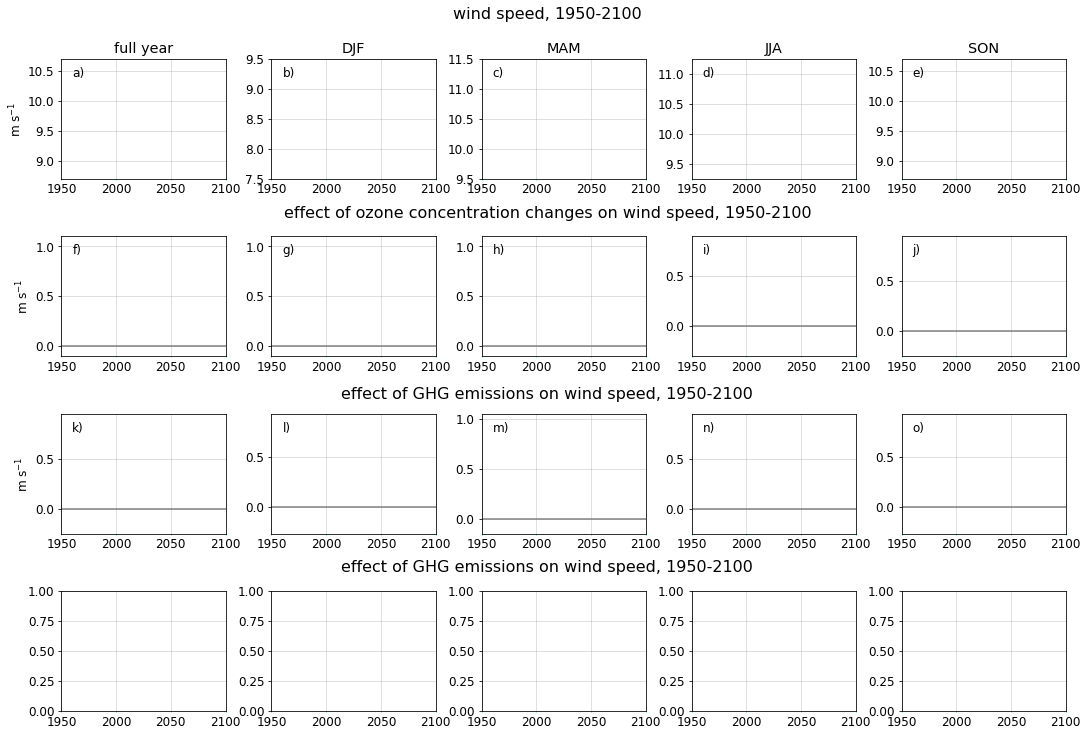

In [94]:
fact = 1
fig, axs = plt.subplots(4,5, figsize=(18*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
# wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
# scens = ['1A', '1B', '2A', '2B', '3A', '3B']

# wspd_2A_50 = wspd_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
# wspd_2B_50 = wspd_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
#wspdset_o3 = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A), (wspd_1B-wspd_2B), (wspd_1A-wspd_2A)]

scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
scens_o3 = ['ozone depl.-fixed ozone \n (SSP 3-7.0)', 'ozone depl.-fixed ozone \n (SSP 1-2.6)',\
            'ozone rec .-fixed ozone \n (SSP 3-7.0)', 'ozone rec .-fixed ozone \n (SSP 1-2.6)']

cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']
cols_t = ['dimgrey', 'silver']
scens_t = ['fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 3-7.0)',\
           'fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 1-2.6)']


############## lines
tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])



ind = 5

ind = 10


##################
### titles, etc
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
t1 = 'wind speed, 1950-2100'
t2 = 'effect of ozone concentration changes on wind speed, 1950-2100'
t3 = 'effect of GHG emissions on wind speed, 1950-2100'
t4 = 'effect of ozone concentration changes and GHG emissions on wind speed, $\overline{2090-2100} - \overline{1950-1960}$'

fs = 16

# plt.figtext(0.5,0.92, t1, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.71, t2, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.5, t3, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")

# #####
# for ind in range(15,20):
#     axs[ind].axhline(y=0, color = 'k', linewidth = 0.5)
#     axs[ind].set_ylim(-0.2,0.82)


for i in range(0,20):
    axs[i].tick_params(axis="x", direction="out", length=1, width=1, color="turquoise")
    axs[i].grid(alpha = 0.5)
    
for i in range(0,20):
    axs[i].set_xlim([1950,2100])
    axs[i].set_xlabel('')
    
for i in range(1,20):
    axs[i].set_xlim([1950,2100])
    axs[i].set_ylabel('')
    
for i in range(0,15):
    #axs[i].set_xlim([1950,2100])
    #axs[i].set_ylabel('')
    axs[i].axhline(y=0, color = 'grey')
    
lab = ['a)','b)','c)','d)','e)',] 
ymi = np.array([8.7,7.5,9.5,9.25,8.7])  
hi = 2
for i in range(0,5):
    axs[i].set_ylim([ymi[i],ymi[i]+hi])
    axs[i].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['f)','g)','h)','i)','j)']  
ymi = np.array([-0.1,-0.1,-0.1,-0.3,-0.25])  
hi = 1.2
for i in range(0,5):
    axs[i+5].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+5].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['k)','l)','m)','n)','o)']  
ymi = np.array([-0.25,-0.27,-0.15,-0.25,-0.27])  
for i in range(0,5):
    axs[i+10].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+10].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['p)','q)','r)','s)','t)']  
ymi = np.array([-0.2,-0.2,-0.2,-0.2,-0.2])
hi = 1.1
# for i in range(0,5):
#     axs[i+15].set_ylim([ymi[i],ymi[i]+hi])
#     axs[i+15].set_xlim([0.7,6.5])
#     axs[i+15].text(1,ymi[i]+0.85*hi,lab[i])

tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])
    
# axs[7].legend(fontsize = 8)
# axs[12].legend()
#plt.tight_layout()
#fig.savefig('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-windline.jpg')

plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
t1 = 'wind speed, 1950-2100'
t2 = 'effect of ozone concentration changes on wind speed, 1950-2100'
t3 = 'effect of GHG emissions on wind speed, 1950-2100'
t4 = 'effect of GHG emissions on wind speed, 1950-2100'

axs[0].set_ylabel('m s$^{-1}$')
axs[5].set_ylabel('m s$^{-1}$')
axs[10].set_ylabel('m s$^{-1}$')


fs = 16
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
plt.figtext(0.5,0.94, t1, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.71, t2, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.5, t3, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")
#plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")


# fname = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-windforpres3.jpg'
# fig.savefig(fname, transparent=None, dpi=250, format=None,
#         metadata=None, bbox_inches=None, pad_inches=0.1,
#         facecolor='auto', edgecolor='auto', backend=None,
#        )

Text(0.5, 0.36, 'effect of GHG emissions on wind speed, 1950-2100')

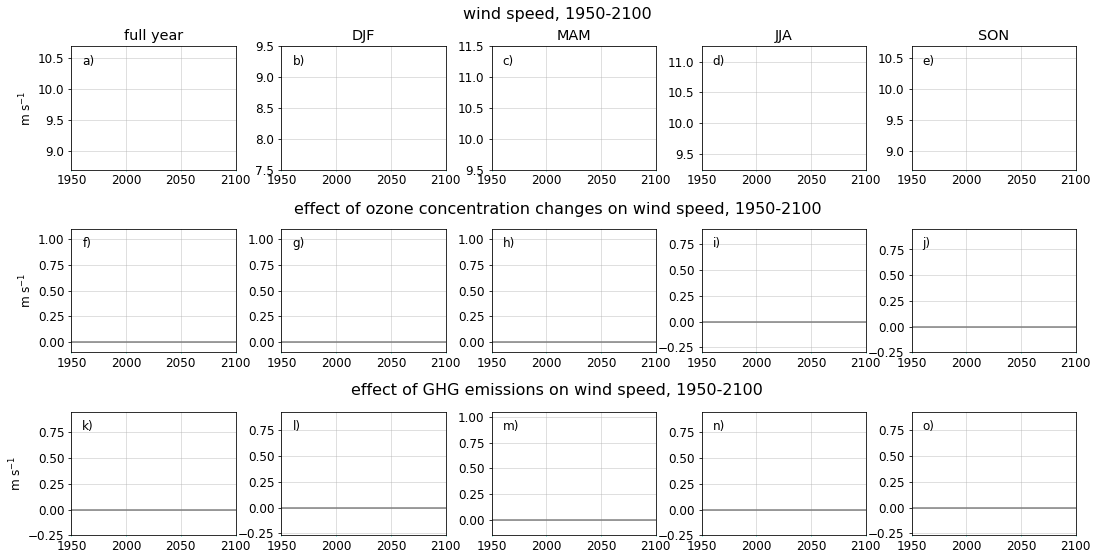

In [95]:
fact = 1
fig, axs = plt.subplots(3,5, figsize=(18*fact, 9*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
# wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
# scens = ['1A', '1B', '2A', '2B', '3A', '3B']

# wspd_2A_50 = wspd_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
# wspd_2B_50 = wspd_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
#wspdset_o3 = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A), (wspd_1B-wspd_2B), (wspd_1A-wspd_2A)]

scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
scens_o3 = ['ozone depl.-fixed ozone \n (SSP 3-7.0)', 'ozone depl.-fixed ozone \n (SSP 1-2.6)',\
            'ozone rec .-fixed ozone \n (SSP 3-7.0)', 'ozone rec .-fixed ozone \n (SSP 1-2.6)']

cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']
cols_t = ['dimgrey', 'silver']
scens_t = ['fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 3-7.0)',\
           'fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 1-2.6)']


############## lines
tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])



ind = 5

ind = 10


##################
### titles, etc
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
t1 = 'wind speed, 1950-2100'
t2 = 'effect of ozone concentration changes on wind speed, 1950-2100'
t3 = 'effect of GHG emissions on wind speed, 1950-2100'
t4 = 'effect of ozone concentration changes and GHG emissions on wind speed, $\overline{2090-2100} - \overline{1950-1960}$'

fs = 16

# plt.figtext(0.5,0.92, t1, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.71, t2, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.5, t3, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")

# #####
# for ind in range(15,20):
#     axs[ind].axhline(y=0, color = 'k', linewidth = 0.5)
#     axs[ind].set_ylim(-0.2,0.82)


for i in range(0,15):
    axs[i].tick_params(axis="x", direction="out", length=1, width=1, color="turquoise")
    axs[i].grid(alpha = 0.5)
    
for i in range(0,15):
    axs[i].set_xlim([1950,2100])
    axs[i].set_xlabel('')
    
for i in range(1,15):
    axs[i].set_xlim([1950,2100])
    axs[i].set_ylabel('')
    
for i in range(0,15):
    #axs[i].set_xlim([1950,2100])
    #axs[i].set_ylabel('')
    axs[i].axhline(y=0, color = 'grey')
    
lab = ['a)','b)','c)','d)','e)',] 
ymi = np.array([8.7,7.5,9.5,9.25,8.7])  
hi = 2
for i in range(0,5):
    axs[i].set_ylim([ymi[i],ymi[i]+hi])
    axs[i].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['f)','g)','h)','i)','j)']  
ymi = np.array([-0.1,-0.1,-0.1,-0.3,-0.25])  
hi = 1.2
for i in range(0,5):
    axs[i+5].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+5].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['k)','l)','m)','n)','o)']  
ymi = np.array([-0.25,-0.27,-0.15,-0.25,-0.27])  
for i in range(0,5):
    axs[i+10].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+10].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['p)','q)','r)','s)','t)']  
ymi = np.array([-0.2,-0.2,-0.2,-0.2,-0.2])
hi = 1.1
# for i in range(0,5):
#     axs[i+15].set_ylim([ymi[i],ymi[i]+hi])
#     axs[i+15].set_xlim([0.7,6.5])
#     axs[i+15].text(1,ymi[i]+0.85*hi,lab[i])

tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])
    
# axs[7].legend(fontsize = 8)
# axs[12].legend()
#plt.tight_layout()
#fig.savefig('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-windline.jpg')

plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
t1 = 'wind speed, 1950-2100'
t2 = 'effect of ozone concentration changes on wind speed, 1950-2100'
t3 = 'effect of GHG emissions on wind speed, 1950-2100'
t4 = 'effect of GHG emissions on wind speed, 1950-2100'

axs[0].set_ylabel('m s$^{-1}$')
axs[5].set_ylabel('m s$^{-1}$')
axs[10].set_ylabel('m s$^{-1}$')


fs = 16
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
plt.figtext(0.5,0.94, t1, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.64, t2, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.36, t3, ha="center", va="top", fontsize=fs, color="k")
#plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")
#plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")


# fname = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-windforpres3.jpg'
# fig.savefig(fname, transparent=None, dpi=250, format=None,
#         metadata=None, bbox_inches=None, pad_inches=0.1,
#         facecolor='auto', edgecolor='auto', backend=None,
#        )

In [96]:
wspdset_sst = [sst_ukesm_1A, sst_ukesm_1B, sst_ukesm_2A, sst_ukesm_2B, sst_ukesm_3A, sst_ukesm_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

sst_ukesm_2A_50 = sst_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
sst_ukesm_2B_50 = sst_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

def plot_thing(wspdset,scens, var, ind = 0, var1 = var):
    for x in range(0,6):
        tsc = scens[x]
        wspd = wspdset[x]

        tv = wspd[var1].groupby('time_counter.year').mean()
        tv = tv.chunk(10)
        tv_rol = tv.rolling(year=10, center=True).mean()
        #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
        tv_rol.plot(ax = axs[0+ind], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name2'])

        tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
        tv = tv.chunk(10)
        tv_rol = tv.rolling(year=10, center=True).mean()
        #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
        tv_rol.plot(ax = axs[1+ind], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name2'])

        tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
        tv = tv.chunk(10)
        tv_rol = tv.rolling(year=10, center=True).mean()
        #tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
        tv_rol.plot(ax = axs[2+ind], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name'])

        tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
        tv = tv.chunk(10)
        tv_rol = tv.rolling(year=10, center=True).mean()
        #tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
        tv_rol.plot(ax = axs[3+ind], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name'])

        tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
        tv = tv.chunk(10)
        tv_rol = tv.rolling(year=10, center=True).mean()
        #tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
        tv_rol.plot(ax = axs[4+ind], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1)

Text(0.5, 0.36, 'maximum overturning, 1950-2100')

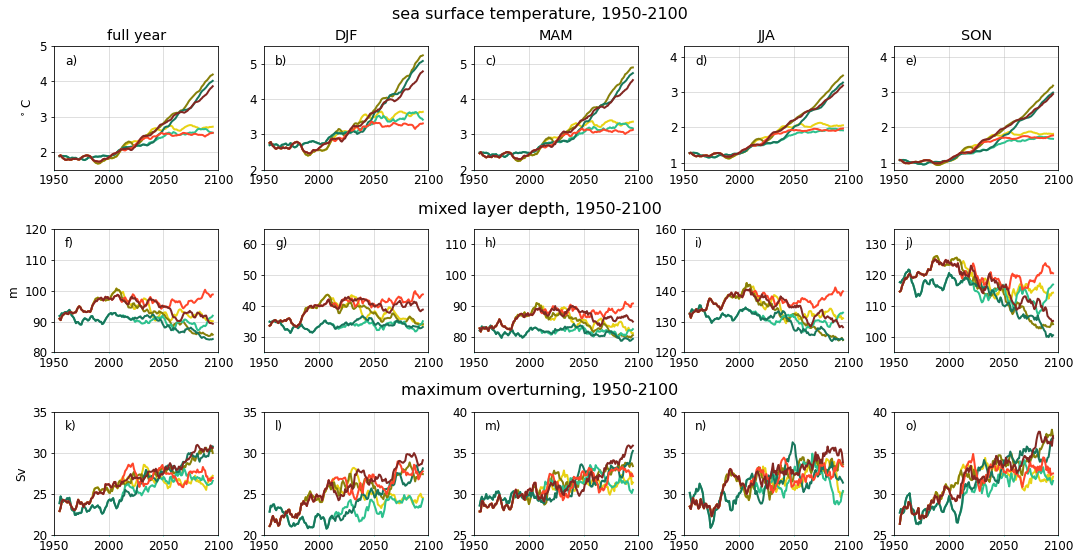

In [97]:
fact = 1
fig, axs = plt.subplots(3,5, figsize=(18*fact, 9*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
# wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
# scens = ['1A', '1B', '2A', '2B', '3A', '3B']

# wspd_2A_50 = wspd_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
# wspd_2B_50 = wspd_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
#wspdset_o3 = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A), (wspd_1B-wspd_2B), (wspd_1A-wspd_2A)]

scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
scens_o3 = ['ozone depl.-fixed ozone \n (SSP 3-7.0)', 'ozone depl.-fixed ozone \n (SSP 1-2.6)',\
            'ozone rec .-fixed ozone \n (SSP 3-7.0)', 'ozone rec .-fixed ozone \n (SSP 1-2.6)']

cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']
cols_t = ['dimgrey', 'silver']
scens_t = ['fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 3-7.0)',\
           'fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 1-2.6)']


############## lines
tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])

wspdset_sst = [sst_ukesm_1A, sst_ukesm_1B, sst_ukesm_2A, sst_ukesm_2B, sst_ukesm_3A, sst_ukesm_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']
plot_thing(wspdset_sst,scens, 'tos',ind = 0, var1 = 'tos')

wspdset_mld = [mld_ukesm_1A, mld_ukesm_1B, mld_ukesm_2A, mld_ukesm_2B, mld_ukesm_3A, mld_ukesm_3B]
plot_thing(wspdset_mld,scens, 'somxl010',ind = 5, var1 = 'somxl010')

wspdset_ot = [ot_ukesm_1A, ot_ukesm_1B, ot_ukesm_2A, ot_ukesm_2B, ot_ukesm_3A, ot_ukesm_3B]
#scens = ['1A', '1B', '2A', '2B', '3A', '3B']
plot_thing(wspdset_ot,scens, 'max_OT',ind = 10, var1 = 'max_OT_yr')

##################
### titles, etc
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
t1 = 'wind speed, 1950-2100'
t2 = 'effect of ozone concentration changes on wind speed, 1950-2100'
t3 = 'effect of GHG emissions on wind speed, 1950-2100'
t4 = 'effect of ozone concentration changes and GHG emissions on wind speed, $\overline{2090-2100} - \overline{1950-1960}$'

fs = 16

# plt.figtext(0.5,0.92, t1, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.71, t2, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.5, t3, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")

# #####
# for ind in range(15,20):
#     axs[ind].axhline(y=0, color = 'k', linewidth = 0.5)
#     axs[ind].set_ylim(-0.2,0.82)


for i in range(0,15):
    axs[i].tick_params(axis="x", direction="out", length=1, width=1, color="turquoise")
    axs[i].grid(alpha = 0.5)
    
for i in range(0,15):
    axs[i].set_xlim([1950,2100])
    axs[i].set_xlabel('')
    
for i in range(1,15):
    axs[i].set_xlim([1950,2100])
    axs[i].set_ylabel('')
    
for i in range(0,15):
    #axs[i].set_xlim([1950,2100])
    #axs[i].set_ylabel('')
    axs[i].axhline(y=0, color = 'grey')
    
lab = ['a)','b)','c)','d)','e)',] 
ymi = np.array([1.5,2,2,0.8,0.8])  
hi = 3.5
for i in range(0,5):
    axs[i].set_ylim([ymi[i],ymi[i]+hi])
    axs[i].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['f)','g)','h)','i)','j)']  
ymi = np.array([80,25,75,120,95])  
hi = 40
for i in range(0,5):
    axs[i+5].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+5].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['k)','l)','m)','n)','o)']  
ymi = np.array([20,20,25,25,25])  
hi = 15
for i in range(0,5):
    axs[i+10].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+10].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['p)','q)','r)','s)','t)']  
ymi = np.array([-0.2,-0.2,-0.2,-0.2,-0.2])
hi = 1.1
# for i in range(0,5):
#     axs[i+15].set_ylim([ymi[i],ymi[i]+hi])
#     axs[i+15].set_xlim([0.7,6.5])
#     axs[i+15].text(1,ymi[i]+0.85*hi,lab[i])

tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])
    
# axs[7].legend(fontsize = 8)
# axs[12].legend()
#plt.tight_layout()
#fig.savefig('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-windline.jpg')

plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
t1 = 'sea surface temperature, 1950-2100'
t2 = 'mixed layer depth, 1950-2100'
t3 = 'maximum overturning, 1950-2100'
t4 = 'effect of GHG emissions on wind speed, 1950-2100'

axs[0].set_ylabel('$^{\circ}$ C')
axs[5].set_ylabel('m')
axs[10].set_ylabel('Sv')


fs = 16
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
plt.figtext(0.5,0.94, t1, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.64, t2, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.36, t3, ha="center", va="top", fontsize=fs, color="k")
#plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")
#plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")


# fname = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-windforpres3.jpg'
# fig.savefig(fname, transparent=None, dpi=250, format=None,
#         metadata=None, bbox_inches=None, pad_inches=0.1,
#         facecolor='auto', edgecolor='auto', backend=None,
#        )

In [1]:
import xarray as xr

In [4]:
Cflx_ukesm_1A = xr.open_dataset('./extracted-summary/Cflx_ukesm1A.nc')
Cflx_ukesm_1B = xr.open_dataset('./extracted-summary/Cflx_ukesm1B.nc')
Cflx_ukesm_2A = xr.open_dataset('./extracted-summary/Cflx_ukesm2A.nc')
Cflx_ukesm_2B = xr.open_dataset('./extracted-summary/Cflx_ukesm2B.nc')
Cflx_ukesm_3A = xr.open_dataset('./extracted-summary/Cflx_ukesm3A.nc')
Cflx_ukesm_3B = xr.open_dataset('./extracted-summary/Cflx_ukesm3B.nc')

In [5]:
Cflx_ukesm_1A

<xarray.Dataset>
Dimensions:  (year: 150)
Coordinates:
  * year     (year) float64 1.95e+03 1.951e+03 1.952e+03 ... 2.098e+03 2.099e+03
Data variables:
    Cflx     (year) float64 ...
Attributes:
    made in:  SOZONEwindAnalyis/oceanFields/investigate-Carbon-jump.ipynb
    desc:     yearly medusa files, saving only variables of interest

In [ ]:
fact = 1
var = 'Cflx'; vardesc = 'overturning'; ylab = 'Sv'
var1 = 'Cflx'

fig, axs = plt.subplots(3,5, figsize=(18*fact, 9*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

###
tlw = 1.5
tlw2 = 0.3 #linewidth
fact = 1.2
ypos = 1.02
fs2 = 10
var = 'max_OT'; vardesc = 'overturning'; ylab = 'Sv'
var1 = 'max_OT_yr'

# #####
wspdset = [ot_ukesm_1A, ot_ukesm_1B, ot_ukesm_2A, ot_ukesm_2B, ot_ukesm_3A, ot_ukesm_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

ot_ukesm_2A_50 = ot_ukesm_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
ot_ukesm_2B_50 = ot_ukesm_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

wspdset_o3 = [(ot_ukesm_3B-ot_ukesm_2B), (ot_ukesm_3A-ot_ukesm_2A), \
              (ot_ukesm_1B-ot_ukesm_2B), (ot_ukesm_1A-ot_ukesm_2A)]
scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']

#wspdset_t = [(wspd_2B-wspd_2B_50), (wspd_2A-wspd_2A_50)]
cols_t = ['dimgrey', 'silver']
scens_t = ['high temp.','low temp.']

for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    
    tv = wspd[var1].groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name2'])
      
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name2'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[4], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1)
    
#axs[3].legend(loc = (0.06, 0.5), ncol = 2, fontsize = 10)

##### ozone effect
ind = 5
for x in range(0,4):
    tsc = scens_o3[x]
    wspd = wspdset_o3[x]
    tv = wspd[var1].groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_o3[x])    
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_o3[x])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_o3[x])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1)
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[4+ind], color = cols_o3[x], linewidth = tlw, linestyle = '-', alpha = 1)
    
#### temperature effect
ind = 10
tv = ot_ukesm_2B[var1].groupby('time_counter.year').mean()-\
ot_ukesm_2B_50[var1].mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[0+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])

tv = ot_ukesm_2B[var].sel(time_counter=(ot_ukesm_2B['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
ot_ukesm_2B_50[var].sel(time_counter=(ot_ukesm_2B_50['time_counter.season'] == 'DJF')).mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[1+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])

tv = ot_ukesm_2B[var].sel(time_counter=(ot_ukesm_2B['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
ot_ukesm_2B_50[var].sel(time_counter=(ot_ukesm_2B_50['time_counter.season'] == 'MAM')).mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])
    
tv = ot_ukesm_2B[var].sel(time_counter=(ot_ukesm_2B['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
ot_ukesm_2B_50[var].sel(time_counter=(ot_ukesm_2B_50['time_counter.season'] == 'JJA')).mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[3+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])

tv = ot_ukesm_2B[var].sel(time_counter=(ot_ukesm_2B['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
ot_ukesm_2B_50[var].sel(time_counter=(ot_ukesm_2B_50['time_counter.season'] == 'SON')).mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[4+ind], color = cols_t[0], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[0])    
    
tv = ot_ukesm_2A[var1].groupby('time_counter.year').mean()-\
ot_ukesm_2A_50[var1].mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[0+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])

tv = ot_ukesm_2A[var].sel(time_counter=(ot_ukesm_2A['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
ot_ukesm_2A_50[var].sel(time_counter=(ot_ukesm_2A_50['time_counter.season'] == 'DJF')).mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[1+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])

tv = ot_ukesm_2A[var].sel(time_counter=(ot_ukesm_2A['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
ot_ukesm_2A_50[var].sel(time_counter=(ot_ukesm_2A_50['time_counter.season'] == 'MAM')).mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])
    
tv = ot_ukesm_2A[var].sel(time_counter=(ot_ukesm_2A['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
ot_ukesm_2A_50[var].sel(time_counter=(ot_ukesm_2A_50['time_counter.season'] == 'JJA')).mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[3+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])

tv = ot_ukesm_2A[var].sel(time_counter=(ot_ukesm_2A['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
ot_ukesm_2A_50[var].sel(time_counter=(ot_ukesm_2A_50['time_counter.season'] == 'SON')).mean().values
tv = tv.chunk(10)
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[4+ind], color = cols_t[1], linewidth = tlw, linestyle = '-', alpha = 1, label = scens_t[1])  


for i in range(0,15):
    axs[i].grid(color = 'grey', linestyle = '-', alpha = 0.5)
    
### effect
ymi = [20,20,25,25,25]
tits0 = [f'a) FY, {vardesc}',f'b) DJF, {vardesc}',f'c) MAM, {vardesc}',\
        f'd) JJA, {vardesc}',f'e) SON, {vardesc}']
for i in range(0,5):
    #axs[i].set_title(tits0[i], y = ypos)
    axs[i].set_xlim([1950,2100])
    #axs[2].legend(loc = 'upper left', ncol = 2, fontsize = fs2)
    #axs[3].legend(loc = (0.06, 0.5), ncol = 2, fontsize = 10)
    #axs[3].legend(bbox_to_anchor = (1,1), ncol = 2, fontsize = 10)
    axs[i].set_ylim([ymi[i], ymi[i]+15])
    axs[i].set_xlabel('')
    
tits = ['f) FY, ozone effect', 'g) DJF, ozone effect','h) MAM, ozone effect',\
        'i) JJA, ozone effect','j) SON, ozone effect']
ind = 5; ymi = -5; yma = 7
for i in range(0+ind,5+ind):
    #axs[i].set_title(tits[i-ind], y = ypos)
    axs[i].set_xlim([1950,2100])
    #axs[2+ind].legend(loc = 'upper right', ncol = 2, fontsize = fs2-2)
    axs[i].set_ylim([ymi,yma])
    axs[i].axhline(y=0, color = 'grey', linestyle = '-')
    axs[i].set_xlabel('')
    
ind = 10; ymi = -3; yma = 10
tits1 = ['k) FY, temp. effect', 'l) DJF, temp. effect','m) MAM, temp. effect',\
        'n) JJA, temp. effect','o) SON, temp. effect']
for i in range(0+ind,5+ind):
    
    #axs[i].set_title(tits1[i-ind], y = ypos)
    axs[i].set_xlim([1950,2100])
    #axs[1+ind].legend(loc = 'upper left', fontsize = fs2)
    axs[i].set_ylim([ymi,yma])
    axs[i].axhline(y=0, color = 'grey', linestyle = '-')
    
axs[0].set_ylabel(f'{ylab}')
axs[5].set_ylabel(f'{ylab}')
axs[10].set_ylabel(f'{ylab}')
    
    


####

def plot_effects(ind,tseas, tvar, tw = 0.8, xticklab = False):
    biggap = 0.8
    smolgap = 0.3
    tplacar = []
    
    tplac = 1
    e_wl, e2 = get_effect_warming(ot_ukesm_2A, seas= tseas, var = tvar )
    axs[ind].bar(tplac,e_wl, color = 'lightgrey',width=tw, )
    tplacar.append(tplac)
    
    tplac = tplac+tw+smolgap
    e_wh, e2 = get_effect_warming(ot_ukesm_2B, seas= tseas, var = tvar )
    axs[ind].bar(tplac,e_wh, color = 'dimgrey',width=tw,)
    tplacar.append(tplac)
    
    tplac = tplac+tw+biggap
    e, e2 = get_effect_ozone(ot_ukesm_1A, ot_ukesm_2A, seas= tseas, var = tvar )
    axs[ind].bar(tplac,e2, color = scendict['1A']['color'],width=tw,)
    tplacar.append(tplac)
    
    tplac = tplac+tw+smolgap
    e, e2 = get_effect_ozone(ot_ukesm_1B, ot_ukesm_2B, seas= tseas, var = tvar )
    axs[ind].bar(tplac,e2, color = scendict['1B']['color'],width=tw,)
    tplacar.append(tplac)
    
    tplac = tplac+tw+biggap
    e, e2 = get_effect_ozone(ot_ukesm_3A, ot_ukesm_2A, seas= tseas, var = tvar )
    axs[ind].bar(tplac,e2, color = scendict['3A']['color'],width=tw,)
    tplacar.append(tplac)
    
    tplac = tplac+tw+smolgap
    e, e2 = get_effect_ozone(ot_ukesm_3B, ot_ukesm_2B, seas= tseas, var = tvar )
    axs[ind].bar(tplac,e2, color = scendict['3B']['color'],width=tw,)
    tplacar.append(tplac)
    
    axs[ind].set_xlim([1-0.5*tw-biggap,tplac+0.5*tw+biggap])

    axs[ind].set_xticks(tplacar)
    axs[ind].set_xticklabels(['','','','','','',], rotation = 60)
    
    if xticklab:     
        axs[ind].set_xticklabels(['GHG (SSP1)', 'GHG (SSP3)', 'OR (SSP 1)',\
                         'OR (SSP 3)','OD (SSP 1)','OD (SSP 3)'], rotation = 80)

    
# ind = 15; tseas = 'FY'; var = 'max_OT_yr'
# plot_effects(ind,tseas,'max_OT_yr', xticklab = True)
# ind = 16; tseas = 'DJF'
# plot_effects(ind,tseas,'max_OT')
# ind = 17; tseas = 'MAM'
# plot_effects(ind,tseas,'max_OT')
# ind = 18; tseas = 'JJA'
# plot_effects(ind,tseas,'max_OT')
# ind = 19; tseas = 'SON'
# plot_effects(ind,tseas,'max_OT')


###
##################
### titles, etc
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
t1 = 'maximum Southern Ocean meridional overturning circulation (MOC) , 1950-2100'
t2 = 'effect of ozone concentration changes on maximum Southern Ocean MOC, 1950-2100'
t3 = 'effect of GHG emissions on maximum Southern Ocean MOC, 1950-2100'
t4 = 'effect of ozone concentration changes and GHG emissions on maximum Southern Ocean MOC, $\overline{2090-2100} - \overline{1950-1960}$'
fs = 16

# plt.figtext(0.5,0.92, t1, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.71, t2, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.5, t3, ha="center", va="top", fontsize=fs, color="k")
# plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")

# #####
for ind in range(1,15):
    axs[ind].set_ylabel('')

# for ind in range(15,20):
#     axs[ind].axhline(y=0, color = 'k', linewidth = 0.5)
#     axs[ind].set_ylim(-0.2,0.82)
axs[0].set_ylabel('Sv')

for i in range(0,15):
    axs[i].tick_params(axis="x", direction="out", length=1, width=1, color="turquoise")
    axs[i].grid(alpha = 0.5)
    
for i in range(0,15):
    axs[i].set_xlim([1950,2100])
    axs[i].set_xlabel('')
    
lab = ['a)','b)','c)','d)','e)',] 
ymi = np.array([20,20,25,25,25])  
hi = 15
for i in range(0,5):
    axs[i].set_ylim([ymi[i],ymi[i]+hi])
    axs[i].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['f)','g)','h)','i)','j)']  
ymi = -5; hi=11
for i in range(0,5):
    axs[i+5].set_ylim([ymi,ymi+hi])
    axs[i+5].text(1960,ymi+0.85*hi,lab[i])
    
lab = ['k)','l)','m)','n)','o)']  
ymi = -5; hi=15
for i in range(0,5):
    axs[i+10].set_ylim([ymi,ymi+hi])
    axs[i+10].text(1960,ymi+0.85*hi,lab[i])
    
# lab = ['p)','q)','r)','s)','t)']  
# ymi = -2
# hi = 13
# for i in range(0,5):
#     axs[i+15].set_ylim([ymi,ymi+hi])
#     axs[i+15].text(1,ymi+0.85*hi,lab[i])
    
tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])
    
# axs[7].legend(fontsize = 8)
# axs[12].legend()
#plt.tight_layout()
#fig.savefig('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-OTline.jpg')

# fname = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/figs/Fig-OTforpres3.jpg'
# fig.savefig(fname, transparent=None, dpi=250, format=None,
#         metadata=None, bbox_inches=None, pad_inches=0.1,
#         facecolor='auto', edgecolor='auto', backend=None,
#        )


In [6]:
sst_ukesm_3B = xr.open_dataset(f'./extracted-summary/SST_ukesm_3B.nc')

In [7]:
sst_ukesm_3B

<xarray.Dataset>
Dimensions:       (time_counter: 1800)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1950-01-01 ... 2099-12-01
Data variables:
    tos           (time_counter) float64 ...
Attributes:
    made in:  SOZONE/windAnalyis/oceanFields/SST.ipynb
    desc: